In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
!ls

Untitled.ipynb   train_sample.csv


In [2]:
data = pd.read_csv('train_sample.csv')

In [3]:
data.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,1/1/1984,Salaried,...,0,No Bureau History Available,0,0,0,0,0,0,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,598,I-Medium Risk,1,1,1,27600,50200,50200,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,No Bureau History Available,0,0,0,0,0,0,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,305,L-Very High Risk,3,0,0,0,0,0,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,9/12/1977,Self employed,...,0,No Bureau History Available,0,0,0,0,0,0,1,1


In [4]:
data.shape

(233154, 29)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   UniqueID                       233154 non-null  int64  
 1   disbursed_amount               233154 non-null  int64  
 2   asset_cost                     233154 non-null  int64  
 3   ltv                            233154 non-null  float64
 4   branch_id                      233154 non-null  int64  
 5   supplier_id                    233154 non-null  int64  
 6   manufacturer_id                233154 non-null  int64  
 7   Current_pincode_ID             233154 non-null  int64  
 8   Date.of.Birth                  233154 non-null  object 
 9   Employment.Type                225493 non-null  object 
 10  DisbursalDate                  233154 non-null  object 
 11  State_ID                       233154 non-null  int64  
 12  Employee_code_ID              

In [6]:
data.dtypes

UniqueID                           int64
disbursed_amount                   int64
asset_cost                         int64
ltv                              float64
branch_id                          int64
supplier_id                        int64
manufacturer_id                    int64
Current_pincode_ID                 int64
Date.of.Birth                     object
Employment.Type                   object
DisbursalDate                     object
State_ID                           int64
Employee_code_ID                   int64
MobileNo_Avl_Flag                  int64
Aadhar_flag                        int64
PAN_flag                           int64
VoterID_flag                       int64
Driving_flag                       int64
Passport_flag                      int64
PERFORM_CNS.SCORE                  int64
PERFORM_CNS.SCORE.DESCRIPTION     object
PRI.NO.OF.ACCTS                    int64
PRI.ACTIVE.ACCTS                   int64
PRI.OVERDUE.ACCTS                  int64
PRI.CURRENT.BALA

In [7]:
#statistical summary
data.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,Passport_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,NO.OF_INQUIRIES,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,0.002127,289.462994,2.440636,1.039896,0.156549,1.659001e+05,2.185039e+05,2.180659e+05,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,0.046074,338.374779,5.217233,1.941496,0.548787,9.422736e+05,2.374794e+06,2.377744e+06,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-6.678296e+06,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,...,0.000000,678.000000,3.000000,1.000000,0.000000,3.500650e+04,6.250000e+04,6.080000e+04,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,1.000000,890.000000,453.000000,144.000000,25.000000,9.652492e+07,1.000000e+09,1.000000e+09,36.000000,1.000000


# Univariate analysis

In [8]:
data['loan_default'].value_counts()

0    182543
1     50611
Name: loan_default, dtype: int64

In [9]:
data.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,1/1/1984,Salaried,...,0,No Bureau History Available,0,0,0,0,0,0,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,598,I-Medium Risk,1,1,1,27600,50200,50200,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,No Bureau History Available,0,0,0,0,0,0,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,305,L-Very High Risk,3,0,0,0,0,0,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,9/12/1977,Self employed,...,0,No Bureau History Available,0,0,0,0,0,0,1,1


In [10]:
data['branch_id'].unique()

array([ 67,  78,  34, 130,  74,  11,   5,  20,  63,  48,  79,   3,  42,
       142,  36,  16, 146, 147,  65,   9,   1, 152,  29,  10,  70,  19,
         7,  85,  61,  17,   8, 153,  18, 162,  68,  72,  64,   2, 160,
       251, 103, 104, 120, 136,  77,  13, 138, 135,  73, 248,  15, 165,
        62,  76, 105, 249, 250, 255, 254,  82, 158, 159, 117, 202, 259,
       207,  35,  69,  97,  43, 257, 258, 260, 111,  66, 261, 101,  14,
       121, 217,  84, 100])

In [11]:
data[(data['Employment.Type'] == "Salaried")&(data['branch_id']==100)]

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,NO.OF_INQUIRIES,loan_default
192434,620818,58259,77933,76.99,100,18731,86,644,15-02-68,Salaried,...,710,D-Very Low Risk,2,1,0,556026,556026,556026,0,0
192436,433804,56259,65761,88.20,100,18731,86,631,1/1/1984,Salaried,...,0,No Bureau History Available,0,0,0,0,0,0,0,0
192437,648534,59213,68817,88.64,100,20571,86,638,10/8/1984,Salaried,...,673,F-Low Risk,6,1,0,-52,50000,21105,0,0
192439,627548,74079,103777,73.23,100,21335,51,656,5/6/1988,Salaried,...,0,No Bureau History Available,0,0,0,0,0,0,0,0
192445,530872,61213,75321,83.64,100,24273,86,650,10/8/1969,Salaried,...,752,C-Very Low Risk,3,2,0,1644411,1678000,1678000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227668,645514,70123,96795,73.35,100,21335,51,652,15-10-96,Salaried,...,17,Not Scored: Not Enough Info available on the c...,1,1,0,17500,21000,21000,0,0
227670,585715,59259,74652,80.37,100,24273,86,657,1/10/1981,Salaried,...,0,No Bureau History Available,0,0,0,0,0,0,0,0
229687,637911,26681,66032,40.89,100,24273,86,646,1/7/1971,Salaried,...,0,No Bureau History Available,0,0,0,0,0,0,0,0
229689,647168,71123,96418,74.67,100,24273,86,668,25-09-88,Salaried,...,721,D-Very Low Risk,5,2,0,13302,75089,75089,1,0


## Finding NULL values

In [12]:
data.apply(lambda x: sum(x.isnull()), axis=0)

UniqueID                            0
disbursed_amount                    0
asset_cost                          0
ltv                                 0
branch_id                           0
supplier_id                         0
manufacturer_id                     0
Current_pincode_ID                  0
Date.of.Birth                       0
Employment.Type                  7661
DisbursalDate                       0
State_ID                            0
Employee_code_ID                    0
MobileNo_Avl_Flag                   0
Aadhar_flag                         0
PAN_flag                            0
VoterID_flag                        0
Driving_flag                        0
Passport_flag                       0
PERFORM_CNS.SCORE                   0
PERFORM_CNS.SCORE.DESCRIPTION       0
PRI.NO.OF.ACCTS                     0
PRI.ACTIVE.ACCTS                    0
PRI.OVERDUE.ACCTS                   0
PRI.CURRENT.BALANCE                 0
PRI.SANCTIONED.AMOUNT               0
PRI.DISBURSE

### Data type conversion using to_datetime(), astype()

In [13]:
data['Date.of.Birth'].dtype, data['DisbursalDate'].dtype

(dtype('O'), dtype('O'))

In [14]:
#changing the data type to date time 
data['Date.of.Birth'] = pd.to_datetime(data['Date.of.Birth'])
data['DisbursalDate'] = pd.to_datetime(data['DisbursalDate'])


In [15]:
data['ltv'] = data['ltv'].astype('int64')

<AxesSubplot:>

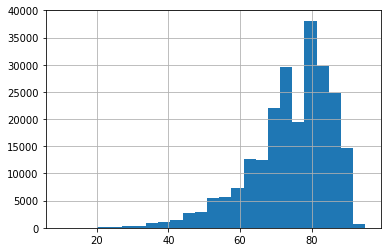

In [16]:

data['ltv'].hist(bins=25)

<AxesSubplot:>

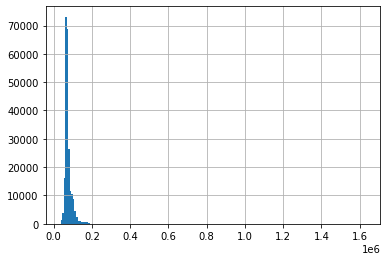

In [18]:
data['asset_cost'].hist(bins=200)

<AxesSubplot:title={'center':'disbursed_amount'}, xlabel='Employment.Type'>

<Figure size 1440x720 with 0 Axes>

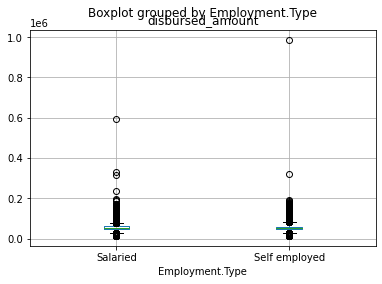

In [21]:
plt.figure(figsize=(20,10))
data.boxplot(column='disbursed_amount', by='Employment.Type')